## Linear SVM Simple Example

In [7]:
from sklearn.svm import SVC
import numpy as np

X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [2 3]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]


In [8]:
x1=clf.support_vectors_[0]
x2=clf.support_vectors_[1]

In [9]:
x1

array([2., 3.])

In [10]:
x2

array([ 6., -1.])

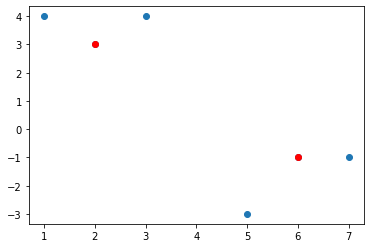

In [11]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.scatter(x1[0],x1[1],color="red")
plt.scatter(x2[0],x2[1],color="red")
plt.show()

## SVM on Multiclass Dataset

### Use RBF, Polynomial and Sigmoid kernel with SVM and compare the performance of the kernels using suitable multiclass data set.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV # Import train_test_split function
from sklearn.svm import SVC #Import svm model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [20]:
data = pd.read_csv("glass.csv")

In [21]:
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [23]:
x = data.drop('Type',axis = 1) 
y = data.Type

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [26]:
ml = SVC(kernel='linear')

In [27]:
ml.fit(x_train, y_train)

SVC(kernel='linear')

In [28]:
print(ml.support_vectors_)

[[7.00000e+01 1.52300e+00 1.33100e+01 3.58000e+00 8.20000e-01 7.19900e+01
  1.20000e-01 1.01700e+01 0.00000e+00 3.00000e-02]
 [7.30000e+01 1.51593e+00 1.30900e+01 3.59000e+00 1.52000e+00 7.31000e+01
  6.70000e-01 7.83000e+00 0.00000e+00 0.00000e+00]
 [1.43000e+02 1.51662e+00 1.28500e+01 3.51000e+00 1.44000e+00 7.30100e+01
  6.80000e-01 8.23000e+00 6.00000e-02 2.50000e-01]
 [1.62000e+02 1.51934e+00 1.36400e+01 3.54000e+00 7.50000e-01 7.26500e+01
  1.60000e-01 8.89000e+00 1.50000e-01 2.40000e-01]
 [1.47000e+02 1.51769e+00 1.36500e+01 3.66000e+00 1.11000e+00 7.27700e+01
  1.10000e-01 8.60000e+00 0.00000e+00 0.00000e+00]
 [1.75000e+02 1.52058e+00 1.28500e+01 1.61000e+00 2.17000e+00 7.21800e+01
  7.60000e-01 9.70000e+00 2.40000e-01 5.10000e-01]
 [1.76000e+02 1.52119e+00 1.29700e+01 3.30000e-01 1.51000e+00 7.33900e+01
  1.30000e-01 1.12700e+01 0.00000e+00 2.80000e-01]
 [1.65000e+02 1.51915e+00 1.27300e+01 1.85000e+00 1.86000e+00 7.26900e+01
  6.00000e-01 1.00900e+01 0.00000e+00 0.00000e+00]


In [29]:
print(ml.n_support_)

[1 2 2 4 3 4]


In [30]:
y_pred = ml.predict(x_test)

In [31]:
print(accuracy_score(y_test,y_pred))

0.9846153846153847


In [32]:
print(confusion_matrix(y_test,y_pred))

[[18  0  0  0  0  0]
 [ 0 27  1  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0 11]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.96      0.98        28
           3       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        11

    accuracy                           0.98        65
   macro avg       0.97      0.99      0.98        65
weighted avg       0.99      0.98      0.99        65



## With Different Kernels

In [34]:
model1=SVC(kernel='sigmoid',gamma=0.001)
model2=SVC(kernel='poly',degree=3)
model3=SVC(kernel='rbf')

In [35]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

SVC()

In [36]:
ypred1=model1.predict(x_test)

In [37]:
ypred2=model2.predict(x_test)

In [38]:
ypred3=model3.predict(x_test)

In [39]:
print(accuracy_score(y_test,ypred1))

0.6923076923076923


In [40]:
print(accuracy_score(y_test,ypred2))

0.9076923076923077


In [41]:
print(accuracy_score(y_test,ypred3))

0.8769230769230769


## Array method of using different kernels

In [42]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'gamma': [1e-3, 1e-4],'degree':[2,3,4]},
                    {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000],'gamma': [1e-3, 1e-4,1e-5]}]

In [43]:
svm_model1 = GridSearchCV(SVC(), params_grid, cv=5)
svm_model1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'gamma': [0.001, 0.0001],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05],
                          'kernel': ['sigmoid']}])

In [44]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'gamma': [0.001, 0.0001],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05],
                          'kernel': ['sigmoid']}])

In [45]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(x_test)

Best score for training data: 1.0 

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.0001 



In [46]:
print(accuracy_score(y_test,Y_pred))

0.9384615384615385
